In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


A

<h2>Reading the data in</h2>

We are using the Github Repositories dataset from Kaggle, which can be found here: https://www.kaggle.com/datasets/donbarbos/github-repos/data. This dataset contains the most popular github repositories with over 167 stars (over 215k). As I did in Assignment 1, I downloaded the dataset and put it in a data folder within my project folder in Jupyter. This means I can read it locally below:

In [2]:
repositories <- read_csv('data/repositories.csv')
head(repositories)

Rows: 215029 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Name, Description, URL, Homepage, Language, License, Topics, Defau...
dbl  (5): Size, Stars, Forks, Issues, Watchers
lgl  (9): Has Issues, Has Projects, Has Downloads, Has Wiki, Has Pages, Has ...
dttm (2): Created At, Updated At

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,⋯,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
freeCodeCamp,freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24 17:49:19,2023-09-21 11:32:33,http://contribute.freecodecamp.org/,387451,374074,33599,248,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-programming-books,2013-10-11 06:50:37,2023-09-21 11:09:25,https://ebookfoundation.github.io/free-programming-books/,17087,298393,57194,46,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
awesome,😎 Awesome lists about all kinds of interesting topics,https://github.com/sindresorhus/awesome,2014-07-11 13:42:37,2023-09-21 11:18:22,NA,1441,269997,26485,61,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
996.ICU,Repo for counting stars and contributing. Press F to pay respect to glorious developers.,https://github.com/996icu/996.ICU,2019-03-26 07:31:14,2023-09-21 08:09:01,https://996.icu,187799,267901,21497,16712,⋯,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,master
coding-interview-university,A complete computer science study plan to become a software engineer.,https://github.com/jwasham/coding-interview-university,2016-06-06 02:34:12,2023-09-21 10:54:48,NA,20998,265161,69434,56,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,main
public-apis,A collective list of free APIs,https://github.com/public-apis/public-apis,2016-03-20 23:49:42,2023-09-21 11:22:06,http://public-apis.org,5088,256615,29254,191,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,master


Here's a brief description of the features/columns in this dataset, which I copied from assignment 1.

| Attribute | Description |
| -- | -- |
| Name | A string of characters representing the name of the repository |
| Description | A string of characters that provides a brief description of the repository |
| URL | A string of characters providing a URL link to the repository  |
| Created At | A DateTime object indicating when the repository was created. |
| Updated At | A DateTime object indicating when the repository was last updated. |
| Homepage | A string of characters providing a URL link to the homepage of the repository. |
| Size | A double indicating the size of the repository in bytes |
| Stars | A double indicating the number of stars (or likes) this repository has received from other users. |
| Forks | A double indicating the number of times this repository has been forked by other users. |
| Issues | A double indicating the number of open issues this repository has. |
| Watchers | A double indicating the number of users who are "watching" or monitoring this repository for updates. |
| Language | A string of characters indicating the primary programming language. |
| License | A string of characters providing information about the software license. |
| Topics | A string of characters providing a list of tags or topics associated with this repository, which improves discoverability and helps users discover other related projects or topics. |
| Has Issues | A boolean indicating whether the repository has an issue tracker enabled. |
| Has Projects | A boolean indicating whether the repository has GitHub Projects enabled to manage tasks and work items |
| Has Downloads | A boolean indicating whether the repository has assets or files that users can download from it. |
| Has Wiki | A boolean indicating whether the repository has a wiki associated with it. |
| Has Pages | A boolean indicating whether the repository has Github Pages enabled, allowing for a website to be hosted based on the repository. |
| Has Discussions | A boolean indicating whether Github Discussions is enabled, allowing for user discussion. |
| Is Fork | A boolean indicating whether this repository is a fork of another repository. If false, not a fork. |
| Is Archived | A boolean indicating whether this repository is archived or not. |
| Is Template | A boolean indicating whether this repository is set up as a template or not. |
| Default Branch | A string of characters representing the name of the default branch. |

<h1>Question</h1>

Based on feedback during the group interview, I have decided to expand my question from "Do repositories with GitHub Projects enabled have a higher number of stars on average than repositories without GitHub Projects enabled?" to:

<h3>Out of the top 3 most popular programming languages, is there an association between the popularity of a repository (measured by stars) and the programming language the repository is based on? Furthermore, for each programming language, is there an association between the popularity of a repository and whether they have a Wiki (measured by Has Wiki) or have Github Projects enabled (measured by Has Projects)? </h3>

<h2>Exploratory Data Analysis</h2>

From group feedback above, I have changed my question to: <b>Out of the top 3 most popular programming languages, is there an association between the popularity of a repository (measured by stars) and the programming language the repository is based on? Furthermore, for each programming language, is there an association between the popularity of a repository and whether they have a Wiki (measured by Has Wiki) or have Github Projects enabled (measured by Has Projects)?</b>

In my EDA, I would first want to remove some columns/features that are most likely irrelevant to my problem as they provide no statistical value about their repository. These include the 'Description' of each repository, the'URL' to each repository, the 'Created At' and 'Updated At' datetime columns, the 'Homepage' of each repository, the 'License' of each repository, and the 'Default Branch' of each repository. 

In [3]:
# from https://stackoverflow.com/questions/68602152/how-to-delete-a-column-in-r
repositories <- within(repositories, rm('Description', 'URL', 'Created At', 'Updated At', 'Homepage', 'License', 'Default Branch'))
head(repositories)

Name,Size,Stars,Forks,Issues,Watchers,Language,Topics,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
freeCodeCamp,387451,374074,33599,248,374074,TypeScript,"['careers', 'certification', 'community', 'curriculum', 'd3', 'education', 'freecodecamp', 'hacktoberfest', 'javascript', 'learn-to-code', 'math', 'nodejs', 'nonprofits', 'programming', 'react', 'teachers']",TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
free-programming-books,17087,298393,57194,46,298393,NA,"['books', 'education', 'hacktoberfest', 'list', 'resource']",TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
awesome,1441,269997,26485,61,269997,NA,"['awesome', 'awesome-list', 'lists', 'resources', 'unicorns']",TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
996.ICU,187799,267901,21497,16712,267901,NA,[],FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
coding-interview-university,20998,265161,69434,56,265161,NA,"['algorithm', 'algorithms', 'coding-interview', 'coding-interviews', 'computer-science', 'data-structures', 'interview', 'interview-prep', 'interview-preparation', 'programming-interviews', 'software-engineering', 'study-plan']",TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
public-apis,5088,256615,29254,191,256615,Python,"['api', 'apis', 'dataset', 'development', 'free', 'list', 'lists', 'open-source', 'public', 'public-api', 'public-apis', 'resources', 'software']",TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Next, lets see which columns have missing values. There are 215029 rows in this dataset. If the non-na values are less than this amount, it means this column/feature contains some missing values.

In [4]:
# from https://www.statology.org/r-count-non-na/
colSums(!is.na(repositories))

Name            Size           Stars           Forks          Issues 
         215027          215029          215029          215029          215029 
       Watchers        Language          Topics      Has Issues    Has Projects 
         215029          198953          215029          215029          215029 
  Has Downloads        Has Wiki       Has Pages Has Discussions         Is Fork 
         215029          215029          215029          215029          215029 
    Is Archived     Is Template 
         215029          215029

It seems 'Name' is missing two values while 'Language' contains a more substantial number of missing values. These are both string-based features. Name is not relevant to our question as it just provides the Name of the repository, but Language could be relevant and may influence other features of the repository (such as # downloads or stars as some languages are more popular than others). As such, I'll replace all these NA values with 'Other' for Language, as that column has the vast majority of NA values.

In [5]:
# from https://stackoverflow.com/questions/10139284/set-na-to-0-in-r
repositories[is.na(repositories)] <- 'Other'
colSums(!is.na(repositories))

Name            Size           Stars           Forks          Issues 
         215029          215029          215029          215029          215029 
       Watchers        Language          Topics      Has Issues    Has Projects 
         215029          215029          215029          215029          215029 
  Has Downloads        Has Wiki       Has Pages Has Discussions         Is Fork 
         215029          215029          215029          215029          215029 
    Is Archived     Is Template 
         215029          215029

Now we have no more missing values in our data!

Next, I want to rename the column names of our binary features to remove the spaces in them, as the spaces make it hard to work with these features in the later parts of this project.

In [6]:
# From https://stackoverflow.com/questions/10688137/how-to-fix-spaces-in-column-names-of-a-data-frame-remove-spaces-inject-dots
names(repositories) <- make.names(names(repositories),unique = TRUE)
head(repositories)

Name,Size,Stars,Forks,Issues,Watchers,Language,Topics,Has.Issues,Has.Projects,Has.Downloads,Has.Wiki,Has.Pages,Has.Discussions,Is.Fork,Is.Archived,Is.Template
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
freeCodeCamp,387451,374074,33599,248,374074,TypeScript,"['careers', 'certification', 'community', 'curriculum', 'd3', 'education', 'freecodecamp', 'hacktoberfest', 'javascript', 'learn-to-code', 'math', 'nodejs', 'nonprofits', 'programming', 'react', 'teachers']",TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
free-programming-books,17087,298393,57194,46,298393,Other,"['books', 'education', 'hacktoberfest', 'list', 'resource']",TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
awesome,1441,269997,26485,61,269997,Other,"['awesome', 'awesome-list', 'lists', 'resources', 'unicorns']",TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
996.ICU,187799,267901,21497,16712,267901,Other,[],FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
coding-interview-university,20998,265161,69434,56,265161,Other,"['algorithm', 'algorithms', 'coding-interview', 'coding-interviews', 'computer-science', 'data-structures', 'interview', 'interview-prep', 'interview-preparation', 'programming-interviews', 'software-engineering', 'study-plan']",TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
public-apis,5088,256615,29254,191,256615,Python,"['api', 'apis', 'dataset', 'development', 'free', 'list', 'lists', 'open-source', 'public', 'public-api', 'public-apis', 'resources', 'software']",TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Next, since we're looking at repositories from the 3 most common programming languages, we need to filter out dataset to only include repositories from them. 

In [7]:
languages <- repositories %>%
    count(Language, sort=TRUE)
top_n(languages, 10)


Selecting by n


Language,n
<chr>,<int>
Python,34331
JavaScript,31831
Other,16076
Java,15298
TypeScript,11670
C++,11391
Go,10712
C,8907
C#,7295


It seems that the 3 most common named programming languages are Python, Javascript, and Java. I won't include repositories with "Other" as their programming language, even though it was the third most common, because they originally had a missing value for their language. This means the repositories could be of any language, and comes with a lot of uncertainty that could negatively impact of results. Therefore, we'll only include repositories whose language is Python, JavaScript, Java, and TypeScript.

In [8]:
repositories_lang <- repositories %>%
    filter(Language == "Python" | Language == "JavaScript" | Language == "Java")
head(repositories_lang)

Name,Size,Stars,Forks,Issues,Watchers,Language,Topics,Has.Issues,Has.Projects,Has.Downloads,Has.Wiki,Has.Pages,Has.Discussions,Is.Fork,Is.Archived,Is.Template
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
public-apis,5088,256615,29254,191,256615,Python,"['api', 'apis', 'dataset', 'development', 'free', 'list', 'lists', 'open-source', 'public', 'public-api', 'public-apis', 'resources', 'software']",TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
system-design-primer,11187,229569,40474,393,229569,Python,"['design', 'design-patterns', 'design-system', 'development', 'interview', 'interview-practice', 'interview-questions', 'programming', 'python', 'system', 'web', 'web-application', 'webapp']",TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
react,345964,213299,44842,1497,213299,JavaScript,"['declarative', 'frontend', 'javascript', 'library', 'react', 'ui']",TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
awesome-python,6696,181326,23837,383,181326,Python,"['awesome', 'collections', 'python', 'python-framework', 'python-library', 'python-resources']",FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
javascript-algorithms,13363,175401,28811,338,175401,JavaScript,"['algorithm', 'algorithms', 'computer-science', 'data-structures', 'interview', 'interview-preparation', 'javascript', 'javascript-algorithms']",TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Python,13858,169000,41926,118,169000,Python,"['algorithm', 'algorithm-competitions', 'algorithms-implemented', 'algos', 'community-driven', 'education', 'hacktoberfest', 'interview', 'learn', 'practice', 'python', 'searches', 'sorting-algorithms', 'sorts']",TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE


In [9]:
dim(repositories_lang)

[1] 81460    17

In [10]:
languages <- repositories_lang %>%
    count(Language, sort=TRUE)
top_n(languages, 10)


Selecting by n


Language,n
<chr>,<int>
Python,34331
JavaScript,31831
Java,15298


Finally, we have lots of repositories in this dataset. I'll take a sample of 5000 repositories and make my visualization based on that. 

In [11]:
set.seed(123)

repositories_sample <- sample_n(repositories_lang, size=3000, replace = FALSE)
dim(repositories_sample)

[1] 3000   17

In [12]:
head(repositories_sample)

Name,Size,Stars,Forks,Issues,Watchers,Language,Topics,Has.Issues,Has.Projects,Has.Downloads,Has.Wiki,Has.Pages,Has.Discussions,Is.Fork,Is.Archived,Is.Template
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
ml-gsn,79900,285,45,9,285,Python,[],TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
trevor-demo,523,251,23,2,251,JavaScript,[],TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
jquery-qrcode,41,4800,2541,88,4800,JavaScript,[],TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
rive-wasm,15710,524,33,17,524,JavaScript,[],TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
react-native-immutable-list-view,1514,206,34,9,206,JavaScript,"['component', 'flatlist', 'immutable', 'immutablejs', 'listview', 'react-native', 'virtualizedlist']",TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
NodeJS-Sample-App,1345,229,393,4,229,JavaScript,[],TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


<h2>Visualization</h2>

The question I proposed was: Out of the top 3 most popular programming languages, is the popularity of a repository (measured by stars) impacted by the programming language the repository is based on? Furthermore, does the popularity for repositories within each programming language increase if they have a Wiki (measured by Has Wiki) or have Github Projects enabled (measured by Has Projects)?

For the visualization, first I will use side-by-side boxplots to graphically compare the distribution of the number of stars for repositories between the 4 most common programming languages. This will let us see the distributions of the number of stars for the repositories by looking at the interquartile range of each boxplot as well as letting us compare their means side by side. 

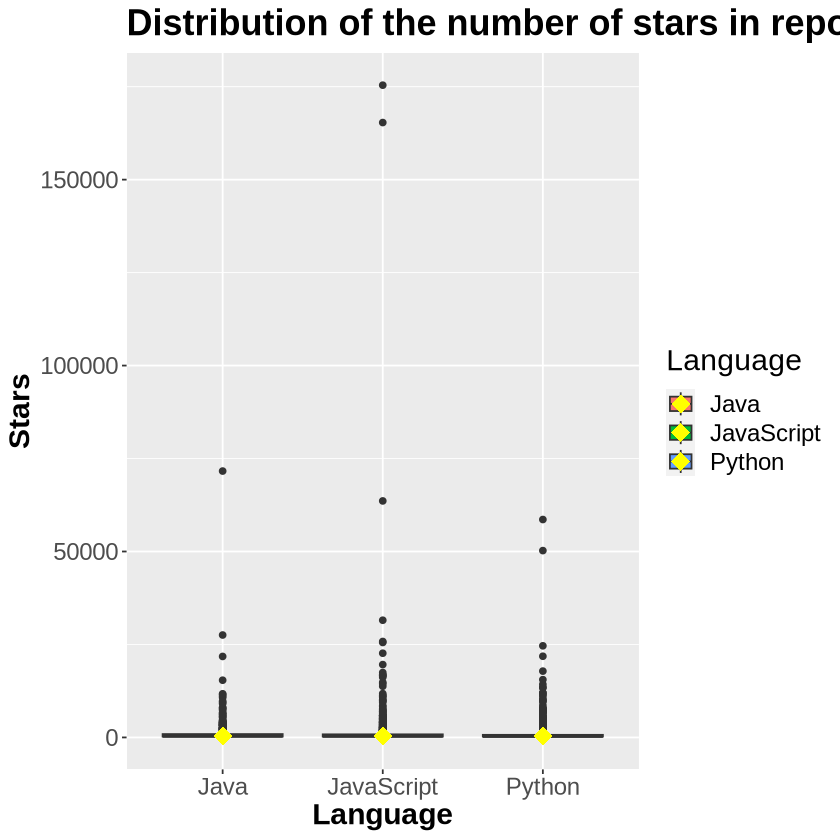

In [13]:
repositories_sample_boxplots <- repositories_sample %>%
  ggplot() +
  geom_boxplot(aes(x=Language, y=Stars, fill = Language)) +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Distribution of the number of stars in repositories between different programming languages") +
  xlab("Language") +
  ylab("Stars") +
  stat_summary(aes(x=Language, y=Stars, fill = Language),
    fun = median, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )

repositories_sample_boxplots

This initial boxplot is very squished along the y-axis as we have some outliers at the top with a very large number of stars that disrupts the scale of the y-axis. Let's remove these outliers and scale the y-axis to exclude the top 10% of outliers with large star amounts.

Warning message:
“Removed 300 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 300 rows containing non-finite values (`stat_summary()`).”


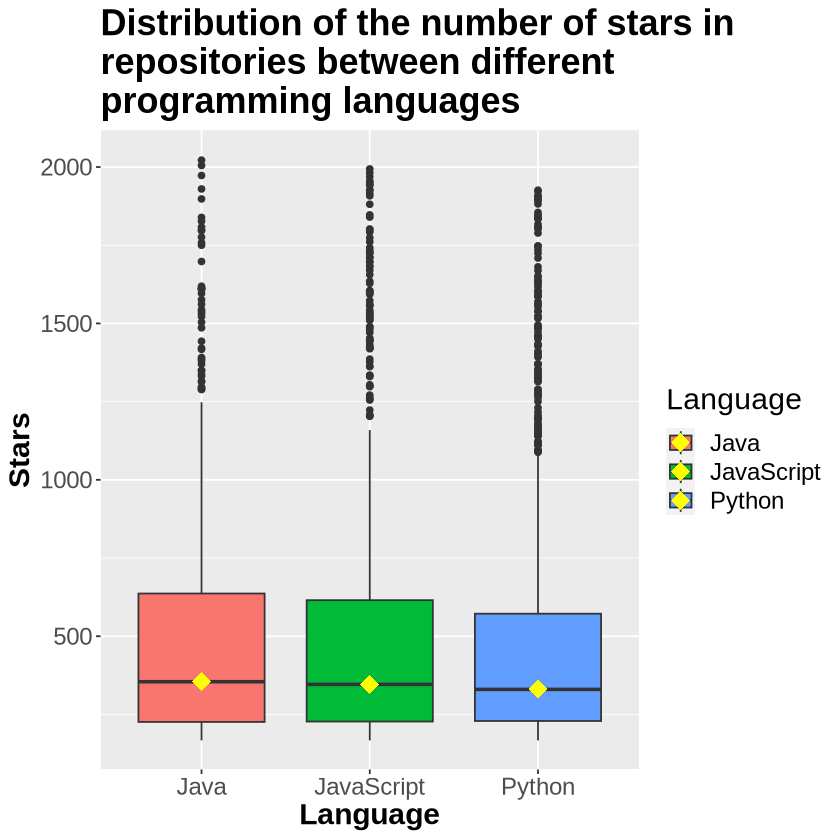

In [14]:
repositories_sample_boxplots <- repositories_sample %>%
  ggplot() +
  geom_boxplot(aes(x=Language, y=Stars, fill = Language)) +
  # from https://stackoverflow.com/questions/5677885/ignore-outliers-in-ggplot2-boxplot
  scale_y_continuous(limits = quantile(repositories_sample$Stars, c(0.00, 0.90))) +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Distribution of the number of stars in \nrepositories between different \nprogramming languages") +
  xlab("Language") +
  ylab("Stars") +
  stat_summary(aes(x=Language, y=Stars, fill = Language),
    fun = median, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )

repositories_sample_boxplots

From this visualization, we can see that the distribution of stars between repositories of different programming languages are very similar. They all have very similar means, and their interquartile range are also very similar, with "Python" having a smallest one as it's the language with the smallest proportion.

In terms of our first part of the question, it does not visually seem like there is an association between stars and the programming language of a repository.

Next, we'll plot the distributions of stars between repositories of these 3 languages based on whether Github Projects is enabled, and whether a wiki is available.

Warning message:
“Removed 300 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 300 rows containing non-finite values (`stat_summary()`).”


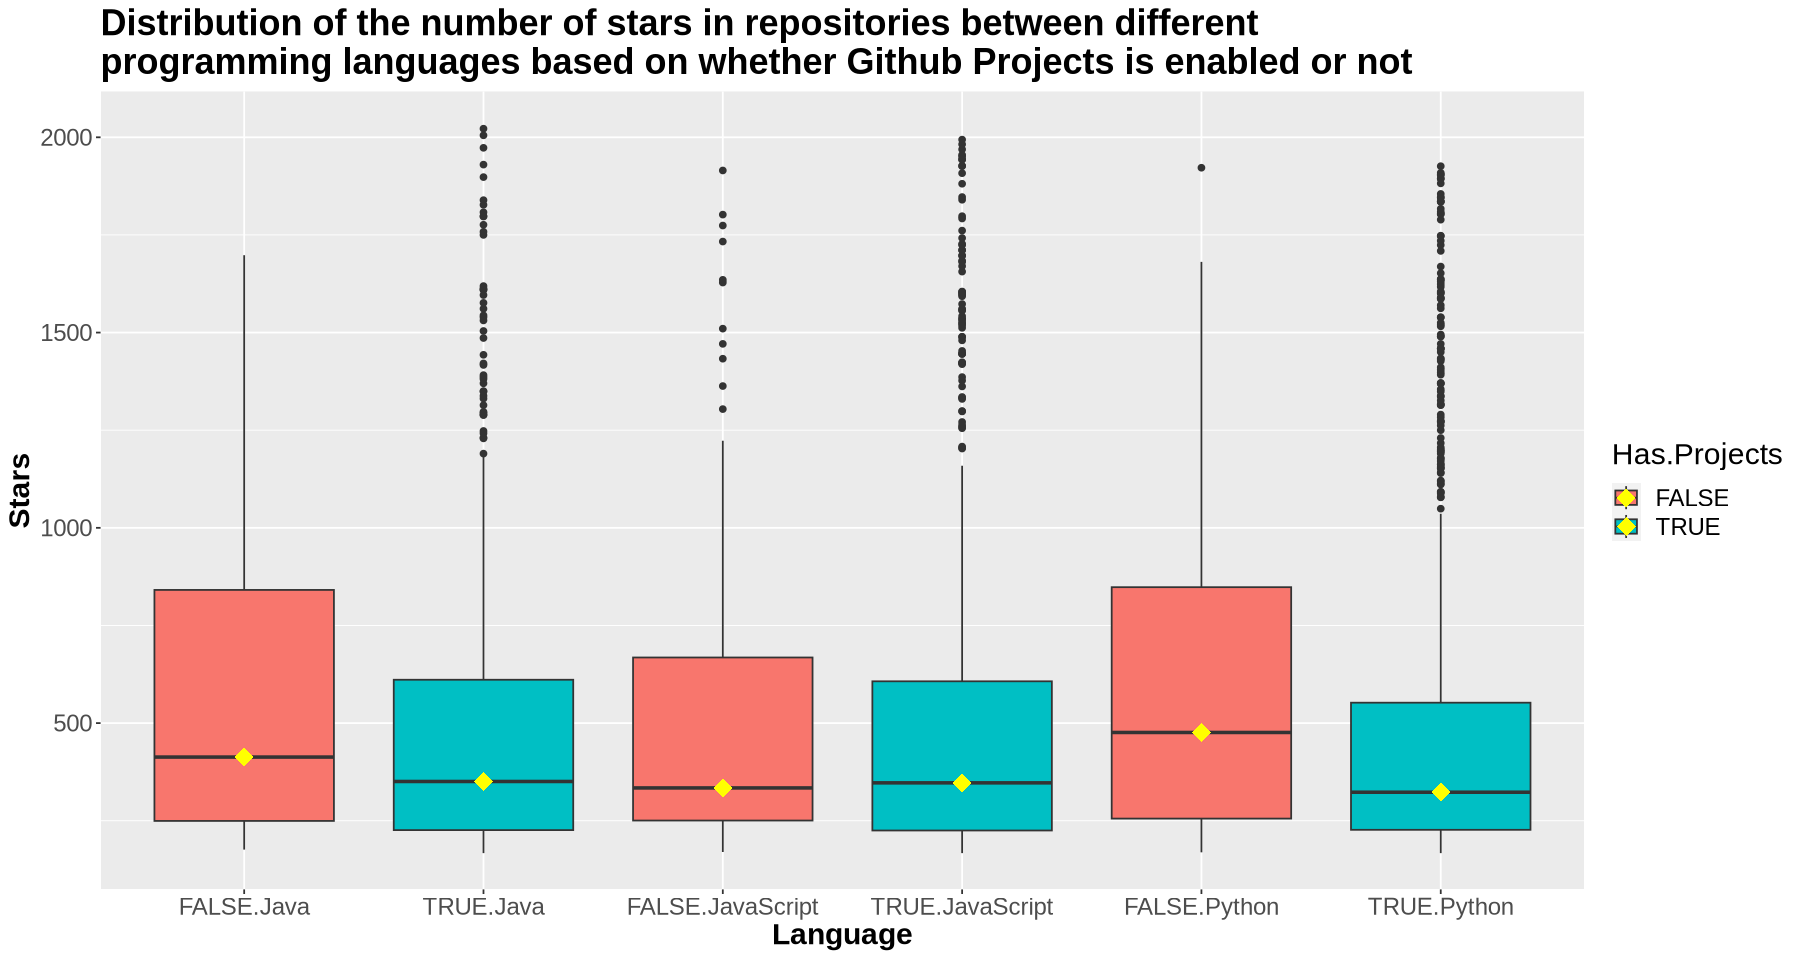

In [15]:
options(repr.plot.width=15, repr.plot.height=8)

# from https://stats.stackexchange.com/questions/11406/boxplot-with-respect-to-two-factors-using-ggplot2-in-r
repositories_sample$projects_lang <- interaction(repositories_sample$Has.Projects, repositories_sample$Language)

repositories_projects_lang_boxplots <- repositories_sample %>%
  ggplot() +
  geom_boxplot(aes(x=projects_lang, y=Stars, fill = Has.Projects)) +
  # from https://stackoverflow.com/questions/5677885/ignore-outliers-in-ggplot2-boxplot
  scale_y_continuous(limits = quantile(repositories_sample$Stars, c(0.00, 0.90))) +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Distribution of the number of stars in repositories between different \nprogramming languages based on whether Github Projects is enabled or not") +
  xlab("Language") +
  ylab("Stars") +
  stat_summary(aes(x=projects_lang, y=Stars, fill = Has.Projects),
    fun = median, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )

repositories_projects_lang_boxplots

Warning message:
“Removed 300 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 300 rows containing non-finite values (`stat_summary()`).”


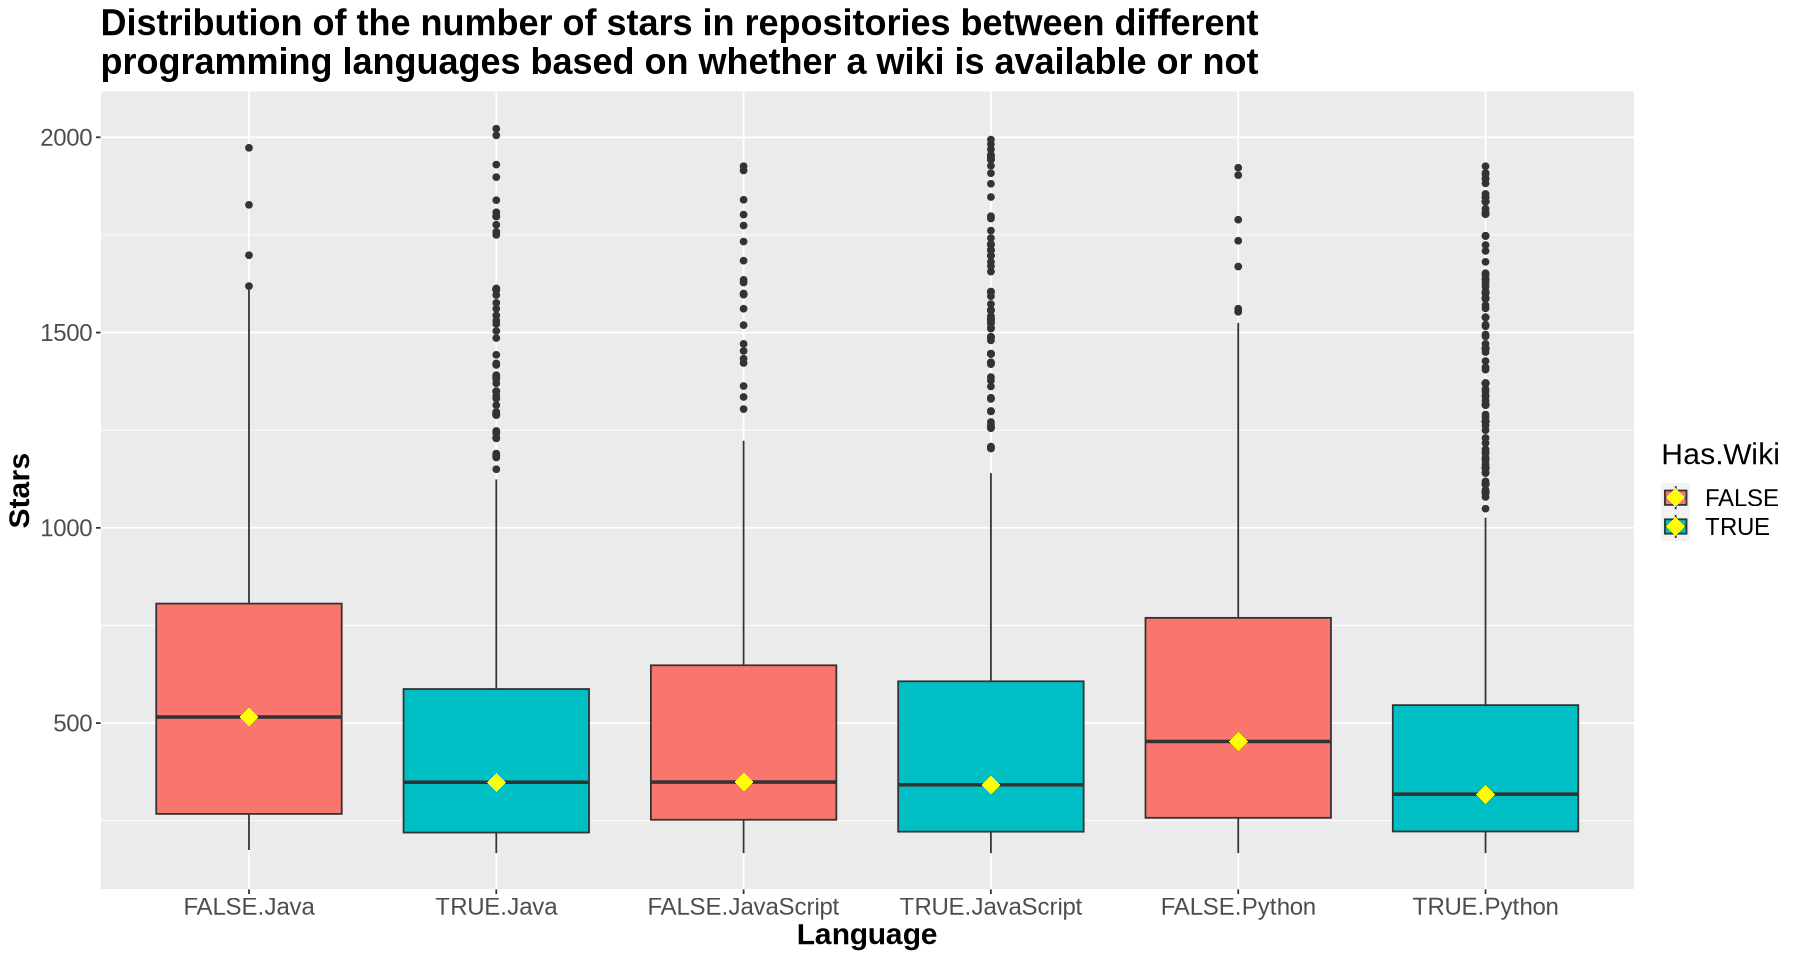

In [16]:
options(repr.plot.width=15, repr.plot.height=8)

# from https://stats.stackexchange.com/questions/11406/boxplot-with-respect-to-two-factors-using-ggplot2-in-r
repositories_sample$wiki_lang <- interaction(repositories_sample$Has.Wiki, repositories_sample$Language)

repositories_wiki_lang_boxplots <- repositories_sample %>%
  ggplot() +
  geom_boxplot(aes(x=wiki_lang, y=Stars, fill = Has.Wiki)) +
  # from https://stackoverflow.com/questions/5677885/ignore-outliers-in-ggplot2-boxplot
  scale_y_continuous(limits = quantile(repositories_sample$Stars, c(0.00, 0.90))) +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Distribution of the number of stars in repositories between different \nprogramming languages based on whether a wiki is available or not") +
  xlab("Language") +
  ylab("Stars") +
  stat_summary(aes(x=wiki_lang, y=Stars, fill = Has.Wiki),
    fun = median, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )

repositories_wiki_lang_boxplots

In [17]:
# from https://www.statology.org/r-count-number-of-occurrences-in-column/
table(repositories_sample$Has.Projects)


FALSE  TRUE 
  316  2684 

In [18]:
table(repositories_sample$Has.Wiki)


FALSE  TRUE 
  545  2455 

In terms of the second part of the question, it visually seems that for Java and Python repositories, having Github Projects not enabled results in higher stars than having it enabled. Likewise, the same can be said for repositories in these two languages with a wiki enabled. In both of these cases, the mean of the boxplot for FALSE (not enabled) is noticeably higher than the mean of its counterpart of TRUE (is enabled). 

However, this could be due to the class imbalance of Has.Projects and Has.Wiki, as for both cases, the number of FALSE cases is much less than the number of TRUE cases. As there's more examples for TRUE, there can be a lot more repositories with lower star counts, which can drag down the mean.

<h2> Question Change </h2>

As mentioned above, based on feedback from the group interview, I have changed my question to: Out of the top 3 most popular programming languages, is there an association between the popularity of a repository (measured by stars) and the programming language the repository is based on? Furthermore, for each programming language, is there an association between the popularity of a repository and whether they have a Wiki (measured by Has Wiki) or have Github Projects enabled (measured by Has Projects)?

<h1>Methods and Plan</h1>

To answer this question, I plan to use Multiple Linear Regression (MLR) to see if a difference in programming language is associated with a change in the popularity of a repository. Using the tidy and lm function, I would be able to answer the first part of my question by comparing the coefficients of the relationship between stars and language and see if there is a statistically significant result between them. The formula I would use in the lm function would be "Stars ~ Language". Additionally, I would be able to address the second part of the question by creating an additive model between Language and Has.Projects, and Language and Has.Wiki for their respective parts. For example, the formula I would use in the lm function for the Wiki case would be "Stars ~ Language + Has.Wiki". With this additive model, we assume that the change in the number of stars for whether a wiki is available or not is the same for all languages. This is an appropriate method as MLR allows us to use categorical variables as it creates dummy variables for each level (2 dummy variables in our case with 1 reference level, so 3 levels total), and gives us an easy way to analyze the association between stars and our exploratory variables. 

Additionally, I can perform an F-Test on the additive model with Language and Has.Wiki or Has.Projects to the model with only Language to verify if my additive model is better than my reduced model of only Language. Using the anova function for this, I can use the p-value to verify this. This would allow me to see if adding Has.Wiki or Has.Projects to our model would be significantly different than just using our reduced model of only Language. Furthermore, I can also use the glance function on my additive model or reduced model to perform an F-test and obtain a adjusted R^2 value, which would let me determine if using these models is better than simply using the null model. Some limitations of using the adjusted R^2 value are that its distribution is unknown so it can't test any hypothesis, and it can't be used to compare models of different sizes as bigger models always have a larger R^2 value since they have more variables. 

For our MLR models, there are a few assumptions as we're assuming a linear model. First, we're assuming that our model is a linear combination of our input variables. Second, we assume that errors are independent. Third, we assume that the conditional distribution of our errors is normal. Fourth, we assume the error terms have equal variance in order to avoid heteroscedasticity. Fifth, we assume that our input variables are not correlated. We also assume that none of our input variables are confounders, where they cause change in both the response and at least one input variable. 

<h1>Implementation of a proposed model</h1>

For this implementation, I'll focus on implementing the additive MLR model between Stars and the input variables Language, Has.Wiki and Has.Projects. 

My first null hypothesis regarding only languages will be that there is no statistical difference in the expected number of stars between repositories of the three most popular languages. The first alternative hypothesis regarding only languages will be that there is a statistical difference in the number of stars between repositories of the three most popular languages. 

My second null hypothesis regarding the whole additive model is that for each language, the change in popularity of repositories on average is not statistically associated with whether they have a wiki or whether they have Github Projects enabled. The second alternative hypothesis regarding the whole additive model is that for each language, the change in popularity of repositories on average is statistically associated with whether they have a wiki or whether they have Github Projects enabled. 

I'll also use a significance level of $\alpha = 0.05$

In [36]:
MLR_repositories = lm(formula = Stars ~ Language + Has.Wiki + Has.Projects, data=repositories_sample)

MLR_repositories_results = tidy(MLR_repositories, conf.int=TRUE) %>% mutate_if(is.numeric, round, 2)
MLR_repositories_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2615.01,374.67,6.98,0.00,1880.38,3349.65
LanguageJavaScript,158.87,274.97,0.58,0.56,-380.27,698.02
LanguagePython,-275.48,268.06,-1.03,0.30,-801.07,250.11
Has.WikiTRUE,-1005.19,306.12,-3.28,0.00,-1605.40,-404.97
Has.ProjectsTRUE,-600.54,385.05,-1.56,0.12,-1355.53,154.45


<h2>Interpretation</h2>

From the p.values between the languages (0.56 for JavaScript and 0.30 for Python), we fail to reject the first null hypothesis, thus, there is no statistical difference in the expected number of stars between repositories of the three most popular languages. From the p.value of Has.Projects, we fail to reject the null hypothesis respective to Has.Projects, thus, on average for each language, there is no statistical association with the change in popularity between repositories with whether they have Github Projects enabled or not. However, from the p.value of Has.Wiki, we reject the null hypothesis respective to Has.Wiki, thus, on average for each language, there is a statistical association with the change in popularity between repositories with whether they have a wiki or not. 